# Market Making with Reinforcement Learning

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Generic
from collections import defaultdict
import random
from tqdm.auto import tqdm

# Data Visualization
import matplotlib.pyplot as plt 

# Reinforcement Learning
import gym
from data_gen import DataGenerator

# Custom Modules
from market_making import MarketMakerEnv

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Set the seed for reproducibility
SEED = 42
np.random.seed(SEED)

## Setup the training environment

In [2]:
lob_data = DataGenerator._generator('data/lob.csv', levels=1)
lob_data = lob_data.head(1000).values

In [3]:
# Create the environment
env = MarketMakerEnv(lob_data, 300)

# Hyperparameters
alpha = 0.1   # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration-exploitation trade-off
epsilon_decay = 0.995
min_epsilon = 0.01
episodes = 1  # Number of episodes

# Initialize the Q-table
q_table = defaultdict(lambda: np.zeros(9))

# Function to choose the next action
def choose_action(state):
    if np.random.random() < epsilon:
        return env.action_space.sample()  # Explore: select a random action
    else:
        return np.argmax(q_table[state])  # Exploit: select the action with max value

In [4]:
# Training loop
for episode in tqdm(range(episodes)):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        state_tuple = tuple(state)  # Convert the state to a tuple for Q-table indexing
        action = choose_action(state_tuple)
        next_state, reward, done, _ = env.step(action)
        next_state_tuple = tuple(next_state)
        
        # Q-learning update rule
        old_value = q_table[state_tuple][action]
        next_max = np.max(q_table[next_state_tuple])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state_tuple][action] = new_value
        
        state = next_state
        total_reward += reward
    
    # Decay epsilon for exploration-exploitation balance
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay
    
    # Print episode results
    if episode % 100 == 0:
        print(f"Episode: {episode}, Total Reward: {total_reward}, Epsilon: {epsilon}")

print("Training completed.")

  0%|          | 0/1 [00:00<?, ?it/s]

mid_price 0.2400000000000091
theta -5
spread 0.12000000000000455
mid_price 0.2400000000000091
theta 2
spread 0.12000000000000455
mid_price 0.2400000000000091
theta -5
spread 0.12000000000000455
mid_price 0.2400000000000091
theta 5
spread 0.12000000000000455
mid_price 0.2400000000000091
theta -2
spread 0.12000000000000455
mid_price 0.2400000000000091
theta 5
spread 0.12000000000000455
mid_price 0.2400000000000091
theta -5
spread 0.12000000000000455
mid_price 0.2400000000000091
theta 2
spread 0.12000000000000455
mid_price 0.2400000000000091
theta -4
spread 0.12000000000000455
mid_price 0.2400000000000091
theta 4
spread 0.12000000000000455
mid_price 0.2400000000000091
theta -2
spread 0.12000000000000455
mid_price 0.2400000000000091
theta 2
spread 0.12000000000000455
mid_price 0.2400000000000091
theta -5
spread 0.12000000000000455
mid_price 0.2400000000000091
theta 2
spread 0.12000000000000455
mid_price 0.2400000000000091
theta -1
spread 0.12000000000000455
mid_price 0.2400000000000091
the

In [5]:
print('Ask book')
display(env.ask_book)
print('Bid book')
display(env.bid_book)

Ask book


{-0.36000000000001364: 30347,
 0.0: 31207,
 -0.12000000000000455: 35193,
 0.12000000000000455: 40743,
 -0.2400000000000091: 17697}

Bid book


{0.8400000000000318: 36879,
 0.4800000000000182: 29805,
 0.36000000000001364: 34307,
 0.6000000000000227: 32105,
 0.7200000000000273: 17813}

## Testing

In [6]:
total_rewards = []
episodes = 100  # Number of episodes for testing

for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        action = np.argmax(q_table[tuple(state)])  # Choose the best action
        state, reward, done, _ = env.step(action)
        total_reward += reward
    
    total_rewards.append(total_reward)

mid_price 2400.0
theta -1
spread 1200.0
mid_price 2400.0
theta 1
spread 1200.0
mid_price 2400.0
theta -1
spread 1200.0
mid_price 2400.0
theta 1
spread 1200.0
mid_price 2400.0
theta -1
spread 1200.0
mid_price 2400.0
theta 1
spread 1200.0
mid_price 2400.0
theta -1
spread 1200.0
mid_price 2400.0
theta 1
spread 1200.0
mid_price 2400.0
theta -1
spread 1200.0
mid_price 2400.0
theta 1
spread 1200.0
mid_price 2400.0
theta -1
spread 1200.0
mid_price 2400.0
theta 1
spread 1200.0
mid_price 2400.0
theta -1
spread 1200.0
mid_price 2400.0
theta 1
spread 1200.0
mid_price 2400.0
theta -1
spread 1200.0
mid_price 2400.0
theta 1
spread 1200.0
mid_price 2400.0
theta -1
spread 1200.0
mid_price 2400.0
theta 1
spread 1200.0
mid_price 2400.0
theta -1
spread 1200.0
mid_price 2400.0
theta 1
spread 1200.0
mid_price 2400.0
theta -1
spread 1200.0
mid_price 2400.0
theta 1
spread 1200.0
mid_price 2400.0
theta -1
spread 1200.0
mid_price 2400.0
theta 1
spread 1200.0
mid_price 2400.0
theta -1
spread 1200.0
mid_price 24

In [ ]:
print('Ask book')
display(env.ask_book)
print('Bid book')
display(env.bid_book)

Ask book


{-1200.0: array([2697893.8], dtype=float32),
 -3600.0: array([2620124.], dtype=float32),
 1200.0: array([20836618.], dtype=float32),
 0.0: array([2658952.2], dtype=float32),
 -2400.0: array([1259062.1], dtype=float32)}

Bid book


{3600.0: array([20759182.], dtype=float32),
 8400.0: array([2628422.8], dtype=float32),
 4800.0: array([2654109.5], dtype=float32),
 6000.0: array([2696008.5], dtype=float32),
 7200.0: array([1270191.1], dtype=float32)}

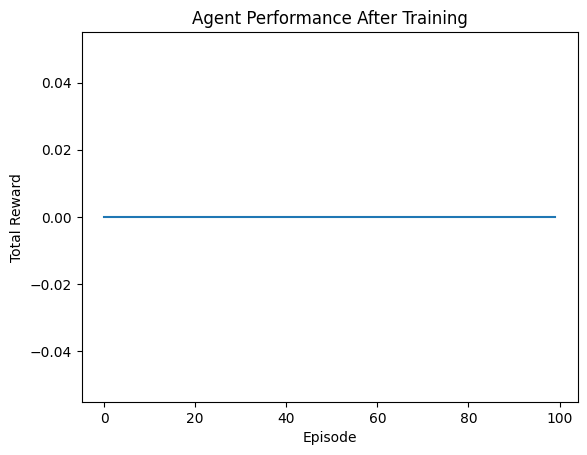

In [ ]:
# Plot total rewards
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Agent Performance After Training')
plt.show()